In [1]:
# import libraries and modules
import os
import glob
import pandas as pd
import numpy as np
import plotly.express as px
import datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the working directory:
os.chdir('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/clusters')

In [8]:
# list all the csv files in the directory:
extension = 'csv'
file_list = [i for i in glob.glob('*.{}'.format(extension))]

In [9]:
# init a dataframe to house all csv files:
df_cluster=pd.DataFrame()

# read all the csv files, add column names and combine them into one dataframe:
for f in file_list:
    df_dengue = pd.read_csv(f)
    df_dengue.columns = ['no_cases', 'street', 'latitude', 'longitude', 'cluster_sn', 'recent_2wk', 'total_cases','date', 'mth']
    df_cluster = pd.concat(objs =[df_cluster,df_dengue],axis=0)

Number Of Cases | Number of reported dengue cases at this location

Street Address | Street address where dengue cases are reported (down to the apartment block level)

Latitude | Latitude of the street address

Longitude | Longitude of the street address

Cluster Number | Every dengue cluster is labelled with a serial number. However, this serial number cannot be used as an unique identifier because (1) the serial number is reused in other snapshots and (2) the serial number will change throughout the cluster's lifetime.

Recent Cases In Cluster** | Number of dengue cases with onset in the last 2 weeks

Total Cases In Cluster | Total number of dengue cases reported in this cluster

Date | Date string in YYMMDD format

Month Number | Index number of the month, where 1=January and 12=December

**NEA published the count of recent cases per cluster only from December 2013 onwards. For prior data, this field is substituted with a placeholder value of -1.

In [10]:
df_cluster.shape

(73606, 9)

In [11]:
df_cluster.head()

no_cases                          street  latitude   longitude  cluster_sn  \
0         4   tampines avenue 5 (block 860)  1.355432  103.937808           1   
1         1  tampines avenue 5 (block 860b)  1.355421  103.937119           1   
2         5   tampines avenue 5 (block 861)  1.355118  103.937242           1   
3         1  tampines avenue 5 (block 861a)  1.354666  103.937225           1   
4         2               tampines avenue 8  1.352493  103.930397           1   

   recent_2wk  total_cases    date  mth  
0          -1          119  130523    5  
1          -1          119  130523    5  
2          -1          119  130523    5  
3          -1          119  130523    5  
4          -1          119  130523    5

In [12]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73606 entries, 0 to 620
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no_cases     73606 non-null  int64  
 1   street       73606 non-null  object 
 2   latitude     73606 non-null  float64
 3   longitude    73606 non-null  float64
 4   cluster_sn   73606 non-null  int64  
 5   recent_2wk   73606 non-null  int64  
 6   total_cases  73606 non-null  int64  
 7   date         73606 non-null  int64  
 8   mth          73606 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 5.6+ MB


In [13]:
# convert to datetime series
df_cluster = df_cluster.drop(columns=['mth'])
df_cluster['date'] = pd.to_datetime(df_cluster['date'], format='%y%m%d')
df_cluster['yr']= df_cluster['date'].dt.year
df_cluster['mth']= df_cluster['date'].dt.month
df_cluster['dt']= df_cluster['date'].dt.day

In [14]:
df_cluster.head()

no_cases                          street  latitude   longitude  cluster_sn  \
0         4   tampines avenue 5 (block 860)  1.355432  103.937808           1   
1         1  tampines avenue 5 (block 860b)  1.355421  103.937119           1   
2         5   tampines avenue 5 (block 861)  1.355118  103.937242           1   
3         1  tampines avenue 5 (block 861a)  1.354666  103.937225           1   
4         2               tampines avenue 8  1.352493  103.930397           1   

   recent_2wk  total_cases       date    yr  mth  dt  
0          -1          119 2013-05-23  2013    5  23  
1          -1          119 2013-05-23  2013    5  23  
2          -1          119 2013-05-23  2013    5  23  
3          -1          119 2013-05-23  2013    5  23  
4          -1          119 2013-05-23  2013    5  23

In [160]:
# plot a map to visualise 2013 case number in clusters:
df_2019 = df_cluster[df_cluster['yr']==2019]

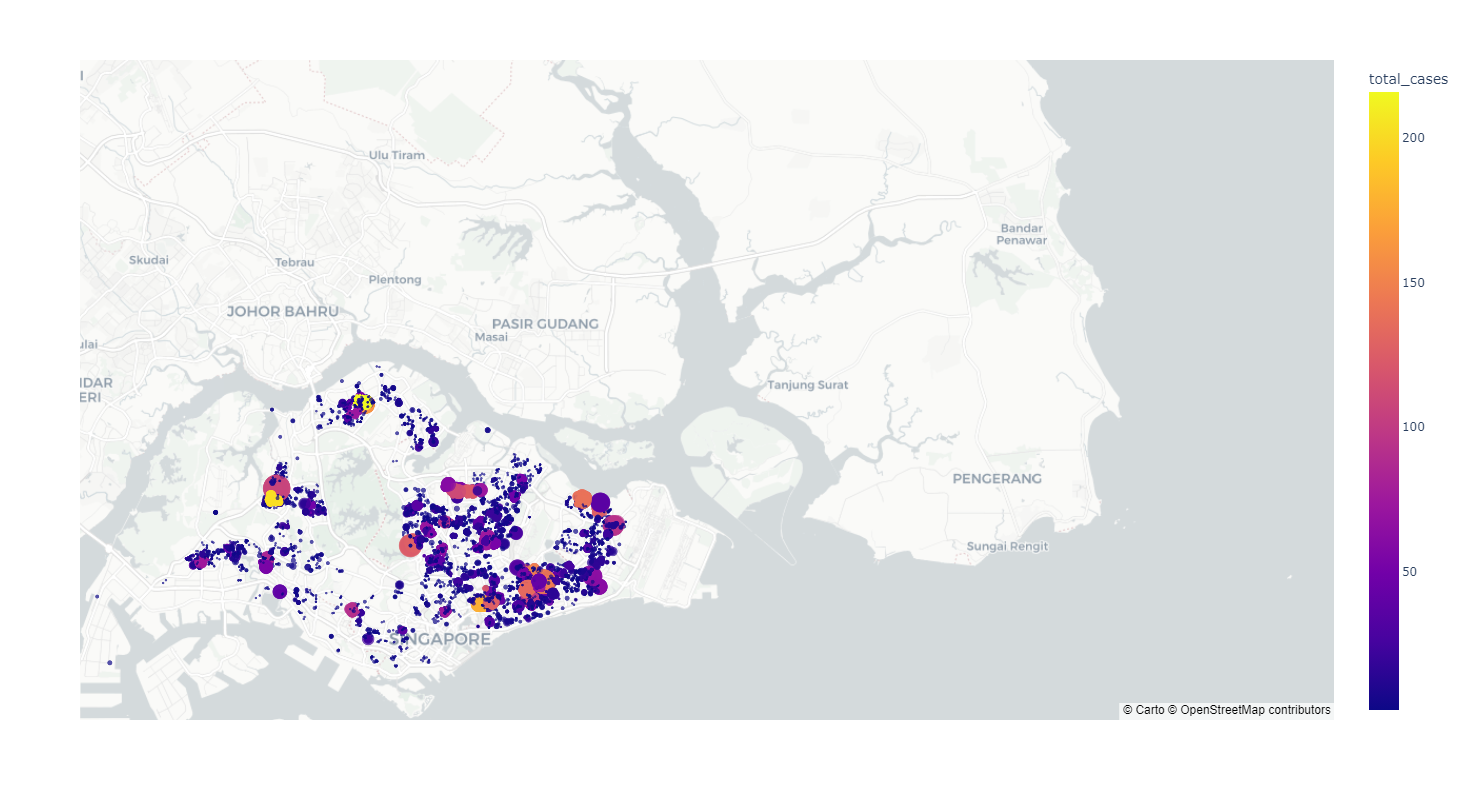

In [161]:
fig = px.scatter_mapbox(df_2019, 
                        lat='latitude', 
                        lon='longitude', 
                        hover_data=['no_cases'],
                        color='total_cases',
                        mapbox_style='carto-positron',
                        size='no_cases',
                        zoom=11, 
                        height=800,
                        width=1500)
fig.show()

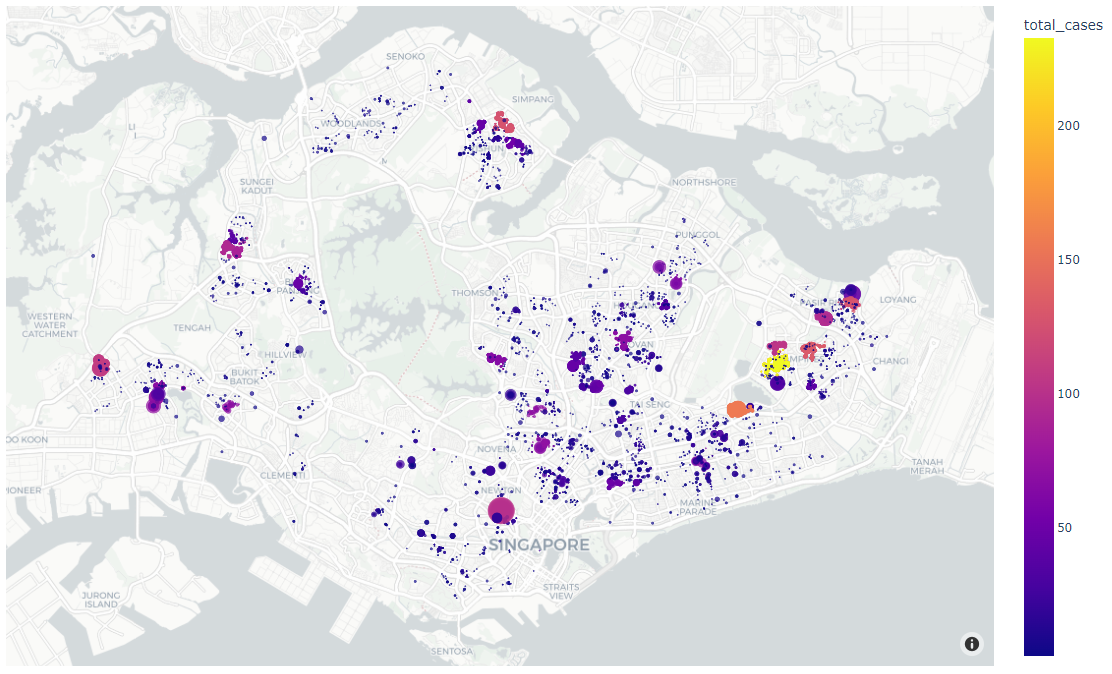

In [12]:
# can plot a series of maps by month to visualise the development of dengue cases over the years.

In [239]:
# create a function to find region of a location using its coordinates:

def get_region(lat, lng):
    
    # define the boundaries of each region in Singapore

    central_region = [(1.2848, 103.7722), (1.3199, 103.9070)]
    east_region = [(1.3200, 103.8862), (1.3730, 103.9910)]
    north_region = [(1.4153, 103.7019), (1.4543, 103.8205)]
    northeast_region = [(1.3600, 103.8536), (1.3984, 103.9200)]
    west_region = [(1.2058, 103.6953), (1.3912, 103.8353)]


    # check if the given coordinates fall within one of the boundaries
    if lat <= 1.3200 and  103.7722 <= lng <= 103.9070:
        return 'Central'
    elif lat <= 1.3730 and 103.8862 <= lng:
        return 'East'
    elif 1.32 <= lat and lng <= 104:
        return 'North'
    elif lng <= 103.7722:
        return 'West'
    elif 1.356 <= lat and 103.8536 <= lng:
        return 'Northeast'
    else:
        return 'Unknown'

In [240]:
# add a new column 'region' with the corresponding region for each coordinate
df_cluster['region'] = df_cluster.apply(lambda row: get_region(row['latitude'], row['longitude']), axis=1)

In [241]:
df_cluster.head()

no_cases                          street  latitude   longitude  cluster_sn  \
0         4   tampines avenue 5 (block 860)  1.355432  103.937808           1   
1         1  tampines avenue 5 (block 860b)  1.355421  103.937119           1   
2         5   tampines avenue 5 (block 861)  1.355118  103.937242           1   
3         1  tampines avenue 5 (block 861a)  1.354666  103.937225           1   
4         2               tampines avenue 8  1.352493  103.930397           1   

   recent_2wk  total_cases       date    yr  mth  dt region  
0          -1          119 2013-05-23  2013    5  23   East  
1          -1          119 2013-05-23  2013    5  23   East  
2          -1          119 2013-05-23  2013    5  23   East  
3          -1          119 2013-05-23  2013    5  23   East  
4          -1          119 2013-05-23  2013    5  23   East

In [242]:
df_cluster.loc[df_cluster['region']=='Unknown']

Empty DataFrame
Columns: [no_cases, street, latitude, longitude, cluster_sn, recent_2wk, total_cases, date, yr, mth, dt, region]
Index: []

In [243]:
df_cluster.to_csv('df_cluster_final.csv')  

In [3]:
# read the climate files:
df_cluster = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/df_cluster_final.csv')
df_climate = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/agg_climate_2013-2019.csv')
df_google = pd.read_csv('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/cleaned_google_data.csv')

In [4]:
df_cluster.head()

Unnamed: 0  no_cases                          street  latitude   longitude  \
0           0         4   tampines avenue 5 (block 860)  1.355432  103.937808   
1           1         1  tampines avenue 5 (block 860b)  1.355421  103.937119   
2           2         5   tampines avenue 5 (block 861)  1.355118  103.937242   
3           3         1  tampines avenue 5 (block 861a)  1.354666  103.937225   
4           4         2               tampines avenue 8  1.352493  103.930397   

   cluster_sn  recent_2wk  total_cases        date    yr  mth  dt region  
0           1          -1          119  2013-05-23  2013    5  23   East  
1           1          -1          119  2013-05-23  2013    5  23   East  
2           1          -1          119  2013-05-23  2013    5  23   East  
3           1          -1          119  2013-05-23  2013    5  23   East  
4           1          -1          119  2013-05-23  2013    5  23   East

In [5]:
df_cluster = df_cluster.drop(columns=['Unnamed: 0','street','latitude','longitude','total_cases','mth','dt'])

In [6]:
df_cluster['date'] = pd.to_datetime(df_cluster['date'], format='%Y-%m-%d', errors='ignore')

In [7]:
df_cluster['week'] = df_cluster['date'].apply(lambda x: x.isocalendar()[1])

In [8]:
df_cluster.head()

no_cases  cluster_sn  recent_2wk       date    yr region  week
0         4           1          -1 2013-05-23  2013   East    21
1         1           1          -1 2013-05-23  2013   East    21
2         5           1          -1 2013-05-23  2013   East    21
3         1           1          -1 2013-05-23  2013   East    21
4         2           1          -1 2013-05-23  2013   East    21

In [11]:
df_cluster = df_cluster.drop(columns=['cluster_sn', 'recent_2wk','date'])

In [12]:
df_cluster = df_cluster.groupby(['yr', 'week', 'region']).agg({'no_cases':'sum'})

In [13]:
df_cluster = df_cluster.reset_index()

In [14]:
df_cluster.shape

(1016, 4)

In [15]:
df_climate.head()

year  week   region  total_daily_rainfall  highest_30min_rainfall  \
0  2013.0     1  Central                   2.6                     NaN   
1  2013.0     1     East                  28.0                     NaN   
2  2013.0     1    North                  50.2                     NaN   
3  2013.0     1     West                  22.8                     NaN   
4  2013.0    21  Central                  72.4                     NaN   

   highest_60min_rainfall  highest_120min_rainfall  max_wind_sp  max_temp  \
0                     NaN                      NaN         48.6      30.6   
1                     NaN                      NaN         39.2      30.4   
2                     NaN                      NaN         40.7      31.5   
3                     NaN                      NaN         53.3      30.7   
4                     NaN                      NaN         43.9      33.6   

   rainy_day  mean_temp  mean_wind_sp  min_temp  
0          1  26.675000      8.920000      24.8  
1          1  26.483333     12.157143      24.8  
2          1  26.000000      9.289474      23.6  
3          1  26.550000      9.250000      24.6  
4          1  28.466667      4.916667      23.7

In [16]:
df_climate = df_climate.iloc[4:]

In [17]:
df_climate['yr']= df_climate['year'].astype(int)

In [18]:
df_cluster_climate = pd.merge(df_cluster, df_climate,  how='right', left_on=['yr','week','region'], right_on = ['yr','week', 'region'])

In [19]:
df_cluster_climate.isnull().sum()

yr                           0
week                         0
region                       0
no_cases                   551
year                         0
total_daily_rainfall         0
highest_30min_rainfall     128
highest_60min_rainfall     128
highest_120min_rainfall    128
max_wind_sp                  0
max_temp                     0
rainy_day                    0
mean_temp                    0
mean_wind_sp                 0
min_temp                     0
dtype: int64

In [20]:
df_cluster_climate = df_cluster_climate.drop(columns= ['highest_30min_rainfall','highest_60min_rainfall','highest_120min_rainfall'])

In [21]:
df_cluster_climate.isnull().sum()

yr                        0
week                      0
region                    0
no_cases                551
year                      0
total_daily_rainfall      0
max_wind_sp               0
max_temp                  0
rainy_day                 0
mean_temp                 0
mean_wind_sp              0
min_temp                  0
dtype: int64

In [22]:
df_central = df_cluster_climate.loc[df_cluster_climate['region']=='Central']
df_east = df_cluster_climate.loc[df_cluster_climate['region']=='East']
df_west = df_cluster_climate.loc[df_cluster_climate['region']=='West']
df_north = df_cluster_climate.loc[df_cluster_climate['region']=='North']

In [23]:
df_google = df_google.drop(columns=['Unnamed: 0'])

In [24]:
df_google.rename(columns={'week':'date'}, inplace=True)

In [25]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d', errors='ignore')

In [26]:
df_google['week'] = df_google['date'].apply(lambda x: x.isocalendar()[1])

In [27]:
df_google['yr'] = df_google['date'].dt.year

In [28]:
df_google = df_google.drop(columns=['date'])

In [29]:
df_central_merge = pd.merge(df_central, df_google,  how='left', left_on=['yr','week'], right_on = ['yr','week'])
df_east_merge = pd.merge(df_east, df_google,  how='left', left_on=['yr','week'], right_on = ['yr','week'])
df_west_merge = pd.merge(df_west, df_google,  how='left', left_on=['yr','week'], right_on = ['yr','week'])
df_north_merge = pd.merge(df_north, df_google,  how='left', left_on=['yr','week'], right_on = ['yr','week'])

In [30]:
df_central_merge.isnull().sum()

yr                             0
week                           0
region                         0
no_cases                     115
year                           0
total_daily_rainfall           0
max_wind_sp                    0
max_temp                       0
rainy_day                      0
mean_temp                      0
mean_wind_sp                   0
min_temp                       0
dengue_fever                   3
dengue                         3
mosquito                       3
insect_repellent               3
dengue_fever_diff              4
dengue_fever_2nd_diff          5
dengue_diff                    4
dengue_2nd_diff                5
mosquito_diff                  4
mosquito_2nd_diff              5
insect_repellent_diff          4
insect_repellent_2nd_diff      5
dtype: int64

In [40]:
df_central_merge['no_cases'].fillna((df_central_merge['no_cases'].mean()), inplace=True)
df_east_merge['no_cases'].fillna((df_east_merge['no_cases'].mean()), inplace=True)
df_west_merge['no_cases'].fillna((df_west_merge['no_cases'].mean()), inplace=True)
df_north_merge['no_cases'].fillna((df_north_merge['no_cases'].mean()), inplace=True)

In [39]:
df_central_merge['no_cases'] = df_central_merge['no_cases'].astype(int)
df_east_merge['no_cases'] = df_east_merge['no_cases'].astype(int)
df_west_merge['no_cases'] = df_west_merge['no_cases'].astype(int)
df_north_merge['no_cases'] = df_north_merge['no_cases'].astype(int)

In [43]:
df_central_merge['year'] = df_central_merge['year'].astype(int)
df_east_merge['year'] = df_east_merge['year'].astype(int)
df_west_merge['year'] = df_west_merge['year'].astype(int)
df_north_merge['year'] = df_north_merge['year'].astype(int)

In [44]:
df_central_merge = df_central_merge.drop(columns=['yr'])
df_east_merge = df_east_merge.drop(columns=['yr'])
df_west_merge = df_west_merge.drop(columns=['yr'])
df_north_merge = df_north_merge.drop(columns=['yr'])

In [41]:
df_central_merge.fillna(0, inplace=True)
df_east_merge.fillna(0, inplace=True)
df_west_merge.fillna(0, inplace=True)
df_north_merge.fillna(0, inplace=True)

In [45]:
df_central_merge.to_csv('./data/df_central_merge.csv')
df_east_merge.to_csv('./data/df_east_merge.csv')
df_west_merge.to_csv('./data/df_west_merge.csv')
df_north_merge.to_csv('./data/df_north_merge.csv')